<a href="https://colab.research.google.com/github/Salman-Fazal-7/Me-vs-My-friend/blob/main/data_pic_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive'

 93a27721-6335-496c-bd98-b22a91965a8f.JPG    Classroom	        IMG_1890.jpeg
'CamScanner 04-28-2024 13.54.pdf'	    'Colab Notebooks'   test
'cats & dogs'				     images
 CB1342BD-1348-4977-801F-35D408B90200.jpeg   IMG_1889.jpeg


In [ ]:
original_dataset_dir = './drive/My Drive/images'
base_dir = './drive/My Drive/Colab Notebooks/work'

In [ ]:
#Making Working folder  run it once
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_salman_dir = os.path.join(train_dir, 'Salman')
train_rizwan_dir = os.path.join(train_dir, 'Rizwan')
validation_salman_dir = os.path.join(validation_dir, 'Salman')
validation_rizwan_dir = os.path.join(validation_dir, 'Rizwan')
test_rizwan_dir = os.path.join(test_dir, 'Rizwan')
test_salman_dir = os.path.join(test_dir, 'Salman')


In [ ]:
#Making Directories /Folders run it once
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

os.mkdir(train_salman_dir)
os.mkdir(train_rizwan_dir)
os.mkdir(validation_salman_dir)
os.mkdir(validation_rizwan_dir)
os.mkdir(test_salman_dir)
os.mkdir(test_rizwan_dir)

In [ ]:
print('total training Salman images:', len(os.listdir(train_salman_dir)))
print('total training Rizwan images:', len(os.listdir(train_rizwan_dir)))
print('total validation Salman images:', len(os.listdir(validation_salman_dir)))
print('total validation Rizwan images:', len(os.listdir(validation_rizwan_dir)))

total training Salman images: 144
total training Rizwan images: 144
total validation Salman images: 0
total validation Rizwan images: 0


./drive/My Drive/images/Salman-4.jpg


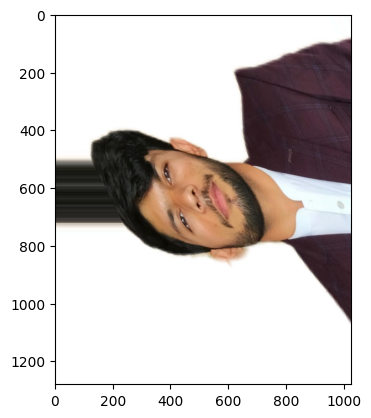

In [ ]:
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[7])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

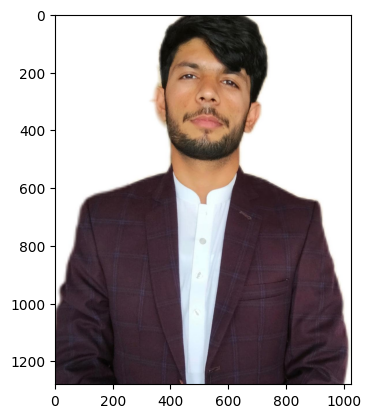

In [ ]:
plt.imshow(img);

# **Salman Data**

In [ ]:
salman_files = ['Salman-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in salman_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_salman_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)


In [ ]:
salman_files = ['Salman-{}.jpg'.format(i) for i in range(1, 5)]
data_generator = ImageDataGenerator()
for file in salman_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(validation_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(validation_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(validation_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(validation_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(validation_salman_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)


In [ ]:
salman_files = ['Salman-{}.jpg'.format(i) for i in range(5, 10)]
data_generator = ImageDataGenerator()
for file in salman_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(test_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(test_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(test_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(test_salman_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)


# **Rizwan data**

In [ ]:
rizwan_files = ['Rizwan-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in rizwan_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_rizwan_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [ ]:
rizwan_files = ['Rizwan-{}.jpg'.format(i) for i in range(1, 5)]
data_generator = ImageDataGenerator()
for file in rizwan_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(validation_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(validation_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(validation_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(validation_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)

    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(validation_rizwan_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [ ]:
rizwan_files = ['Rizwan-{}.jpg'.format(i) for i in range(5, 10)]
data_generator = ImageDataGenerator()
for file in rizwan_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)

    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(test_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)

    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(test_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)

    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(test_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)

    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(test_rizwan_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)


In [ ]:
print('total training Salman images:', len(os.listdir(train_salman_dir)))
print('total training Rizwan images:', len(os.listdir(train_rizwan_dir)))
print('total validation Salman images:', len(os.listdir(validation_salman_dir)))
print('total validation Rizwan images:', len(os.listdir(validation_rizwan_dir)))
print('total test Salman images:', len(os.listdir(test_salman_dir)))
print('total test Rizwan images:', len(os.listdir(test_rizwan_dir)))

total training Salman images: 144
total training Rizwan images: 144
total validation Salman images: 64
total validation Rizwan images: 64
total test Salman images: 20
total test Rizwan images: 20


# **Building model**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # Assuming binary classification

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

# **Compilation (optimizer & loss)**

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=1e-4), # Use learning_rate instead of lr
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 288 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


 **Fitting**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - acc: 0.4437 - loss: 0.6923 - val_acc: 0.5000 - val_loss: 0.6711
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - acc: 0.5512 - loss: 0.6640 - val_acc: 0.5156 - val_loss: 0.6384
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - acc: 0.5894 - loss: 0.6504 - val_acc: 0.5391 - val_loss: 0.6006
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 190ms/step - acc: 0.6647 - loss: 0.6116 - val_acc: 0.7656 - val_loss: 0.5972
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 211ms/step - acc: 0.6932 - loss: 0.5847 - val_acc: 0.7891 - val_loss: 0.5073
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - acc: 0.7522 - loss: 0.5352 - val_acc: 0.8438 - val_loss: 0.4725
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - acc: 0.7634 - loss: 0.5243 - val_acc: 0.8984 - val_loss: 0.4355
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - acc: 0.8120 - loss: 0.4879 - val_acc: 0.9219 - val_loss: 0.3914
Epoch 9/30
100/100 ━━━━━━━━━━━━━

In [ ]:
model.save("salman_and_rizwan_1.h5")

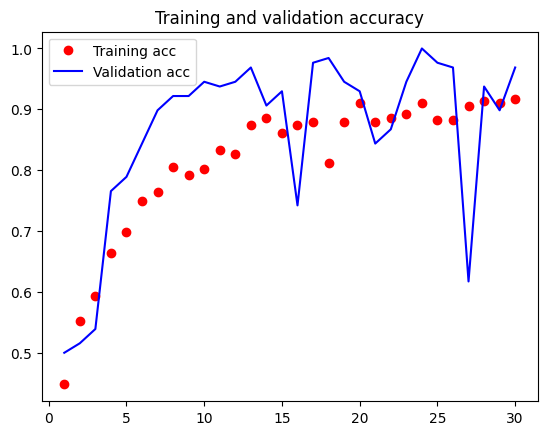

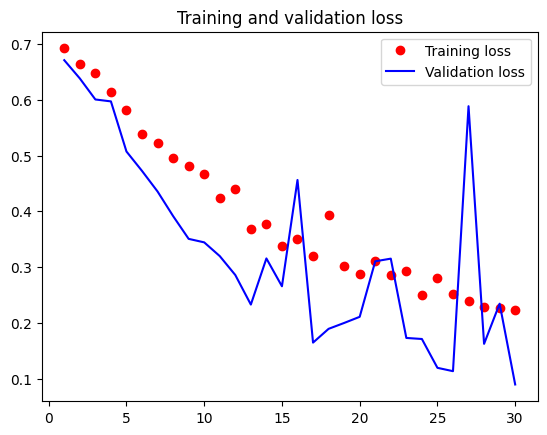

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Data augmentation by ImageDataGenerator**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Displaying some random images after augmentation

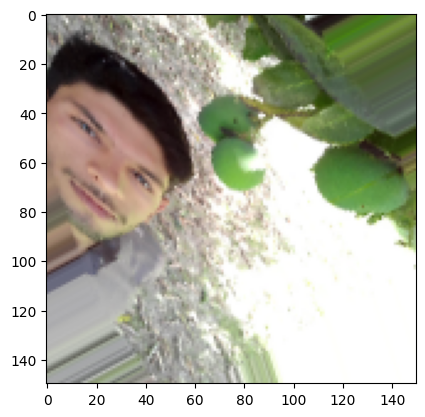

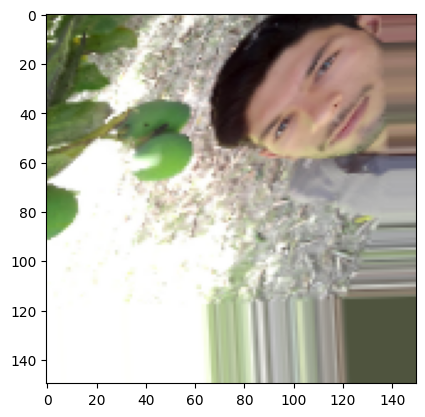

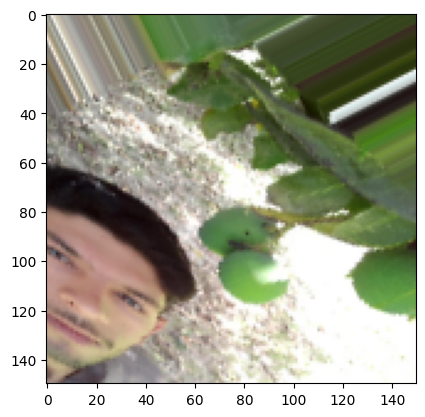

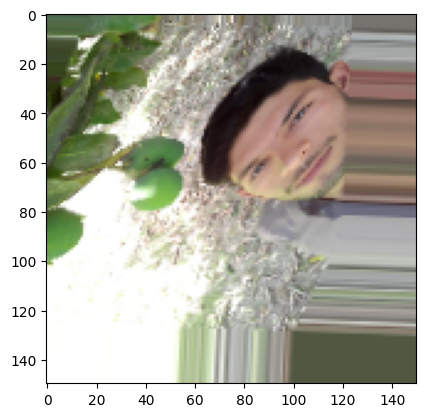

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_salman_dir, fname) for
          fname in os.listdir(train_salman_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# New model includes dropout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Summary

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

# Again Compilation

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4), # Change 'lr' to 'learning_rate'
              metrics=['acc'])

# Trainning using data augmentation generators

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 288 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


# Fitting

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=80,
    epochs=60,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - acc: 0.5158 - loss: 0.6832 - val_acc: 0.5000 - val_loss: 0.6656
Epoch 2/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - acc: 0.5006 - loss: 0.6789 - val_acc: 0.5000 - val_loss: 0.6545
Epoch 3/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - acc: 0.5355 - loss: 0.6630 - val_acc: 0.5000 - val_loss: 0.6682
Epoch 4/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - acc: 0.5874 - loss: 0.6551 - val_acc: 0.8047 - val_loss: 0.6041
Epoch 5/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - acc: 0.6546 - loss: 0.6186 - val_acc: 0.8672 - val_loss: 0.5543
Epoch 6/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - acc: 0.7243 - loss: 0.6016 - val_acc: 0.5000 - val_loss: 0.6979
Epoch 7/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - acc: 0.6850 - loss: 0.5995 - val_acc: 0.8750 - val_loss: 0.4721
Epoch 8/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - acc: 0.7503 - loss: 0.5456 - val_acc: 0.9219 - val_loss: 0.4453
Epoch 9/60
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - acc: 0.7

In [ ]:
model.save('salman_and_rizwan_2.h5')

# Plotting

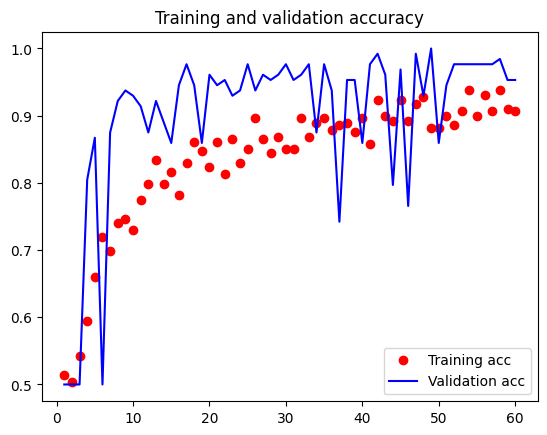

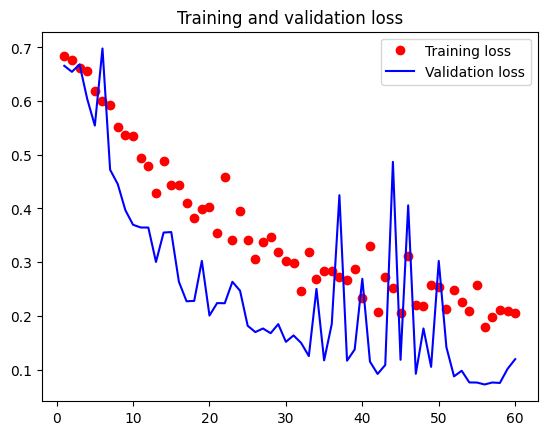

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predict_dir_path = "/content/drive/My Drive/Colab Notebooks/work/test"

In [ ]:
from os import listdir
from os.path import isfile, join

onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path,f))]
print(onlyfiles)

['21.jpg', '22.jpg', '24.jpg', '25.jpg', '23.jpg', '3.jpg', '12.jpg', '7.jpg', '13.jpg', '11.jpg', '5.jpg', '10.jpg', '6.jpg', '18.jpg', '15.jpg', '4.jpg', '9.jpg', '20.jpg', '14.jpg', '16.jpg', '8.jpg', '1.jpg', '19.jpg', '2.jpg', '17.jpg']


In [ ]:
# predicting images
from tensorflow.keras.preprocessing import image
import numpy as np #Import numpy

rizwan_counter = 0
salman_counter  = 0
for file in onlyfiles:
    # Add a '/' between the directory path and the filename
    img = image.load_img(predict_dir_path+'/'+file, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    # Use `predict` method instead of `predict_classes`
    classes = model.predict(images, batch_size=20)
    # Get the class with the highest probability
    classes = np.argmax(classes, axis=-1)
    classes = classes[0]

    if classes == 0:
        print(file + ": " + 'salman')
        salman_counter += 1
    else:
        print(file + ": " + 'rizwan')
        rizwan_counter += 1
print("Total Rizwan :",rizwan_counter)
print("Total Salman :",salman_counter)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
21.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
22.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
24.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
25.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
23.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
12.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
13.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
11.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
18.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
15.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
20.jpg: salman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
14.jpg: salma